In [2]:
import pandas as pd
import numpy as np


In [5]:
df =pd.read_excel("transaction.xlsx")

In [6]:
df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,transaction_id.1
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,3933.333333
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,4159.666667
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,546.333333
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,4206.666667
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1072.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,-11956.333333
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,-13148.333333
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,-10257.666667
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,-9645.333333


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    20000 non-null  int64         
 1   product_id        20000 non-null  int64         
 2   customer_id       20000 non-null  int64         
 3   transaction_date  20000 non-null  datetime64[ns]
 4   online_order      20000 non-null  float64       
 5   order_status      20000 non-null  object        
 6   brand             20000 non-null  object        
 7   product_line      20000 non-null  object        
 8   product_class     20000 non-null  object        
 9   product_size      20000 non-null  object        
 10  list_price        20000 non-null  float64       
 11  standard_cost     20000 non-null  float64       
 12  transaction_id.1  20000 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB


In [29]:
# changing online_order datatype from float to object
df["online_order"].astype(object)

0        0.0
1        1.0
2        0.0
3        0.0
4        1.0
        ... 
19995    1.0
19996    1.0
19997    1.0
19998    0.0
19999    1.0
Name: online_order, Length: 20000, dtype: object

In [28]:
df.isna().sum()

transaction_id      0
product_id          0
customer_id         0
transaction_date    0
online_order        0
order_status        0
brand               0
product_line        0
product_class       0
product_size        0
list_price          0
standard_cost       0
transaction_id.1    0
dtype: int64

In [ ]:
df.duplicated().sum()

In [43]:
#filling up all missing column values using mode
round(df["standard_cost"].mean(), 2)

554.4

In [44]:
standard_cost_mean= round(df["standard_cost"].mean(), 2)
df.standard_cost.fillna(standard_cost_mean, inplace=True)

In [39]:
df.online_order.value_counts()

1.0    10189
0.0     9811
Name: online_order, dtype: int64

In [ ]:
brand_mode=df["brand"].mode()[0]
df.brand.fillna(brand_mode, inplace=True)

In [ ]:
# TransactionMonth
# CohortMonth
# CohortIndex

In [45]:
df.transaction_date

0       2017-02-25
1       2017-05-21
2       2017-10-16
3       2017-08-31
4       2017-10-01
           ...    
19995   2017-06-24
19996   2017-11-09
19997   2017-04-14
19998   2017-07-03
19999   2017-09-22
Name: transaction_date, Length: 20000, dtype: datetime64[ns]

In [54]:
import datetime as dt

In [55]:
#extracting month and year and alos rounding all the days to 1
date_extract =lambda x: dt.datetime(x.year, x.month, 1)

In [59]:
df["transactionMonth"] = df.transaction_date.apply(date_extract)

In [65]:
df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,transaction_id.1,transactionMonth,cohortMonth
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,3933.333333,2017-02-01,2017-02-01
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,4159.666667,2017-05-01,2017-01-01
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,546.333333,2017-10-01,2017-01-01
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,4206.666667,2017-08-01,2017-02-01
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1072.000000,2017-10-01,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,-11956.333333,2017-06-01,2017-01-01
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,-13148.333333,2017-11-01,2017-01-01
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,-10257.666667,2017-04-01,2017-04-01
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,-9645.333333,2017-07-01,2017-02-01


In [66]:
# want to check a particular customer transaction till date 
df.query("customer_id==2950")
# this customer has made transaction 3 times and we can say his cohort month is feb cos that was his registration month

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,transaction_id.1,transactionMonth,cohortMonth
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,3933.333333,2017-02-01,2017-02-01
11064,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,-3443.000000,2017-10-01,2017-02-01
18922,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,478.16,298.72,-8661.333333,2017-04-01,2017-02-01


In [64]:
# to group dataframe and extracting the minimum month of transaction as the registration/cohort month for each customer
df["cohortMonth"] = df.groupby("customer_id")["transactionMonth"].transform(min)

In [69]:
# CohortIndex
year_diff = df["transactionMonth"].dt.year - df.cohortMonth.dt.year
month_diff = df["transactionMonth"].dt.month - df.cohortMonth.dt.month

In [73]:
df["CohortIndex"] = year_diff * 12 + month_diff + 1

In [74]:
df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,transaction_id.1,transactionMonth,cohortMonth,CohortIndex
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,3933.333333,2017-02-01,2017-02-01,1
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,4159.666667,2017-05-01,2017-01-01,5
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,546.333333,2017-10-01,2017-01-01,10
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,4206.666667,2017-08-01,2017-02-01,7
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1072.000000,2017-10-01,2017-01-01,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,-11956.333333,2017-06-01,2017-01-01,6
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,-13148.333333,2017-11-01,2017-01-01,11
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,-10257.666667,2017-04-01,2017-04-01,1
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,-9645.333333,2017-07-01,2017-02-01,6


In [77]:
cohort_data = df.groupby (["CohortIndex", "cohortMonth"]) ["customer_id"] . apply (pd.Series.nunique).reset_index()

# RETENTION METRIC

In [80]:
cohort_data_pivot = cohort_data.pivot_table(columns= "CohortIndex", index = "cohortMonth", values = "customer_id")

In [83]:
cohort_data_pivot

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
cohortMonth,,,,,,,,,,,,
2017-01-01,1354.0,486.0,508.0,509.0,502.0,483.0,518.0,529.0,500.0,531.0,497.0,516.0
2017-02-01,800.0,325.0,298.0,313.0,288.0,298.0,308.0,281.0,329.0,308.0,296.0,NaN
2017-03-01,484.0,167.0,174.0,167.0,182.0,184.0,172.0,212.0,189.0,181.0,NaN,NaN
2017-04-01,336.0,111.0,121.0,153.0,143.0,121.0,142.0,126.0,132.0,NaN,NaN,NaN
2017-05-01,210.0,85.0,81.0,87.0,71.0,74.0,73.0,81.0,NaN,NaN,NaN,NaN
2017-06-01,122.0,45.0,44.0,47.0,46.0,46.0,53.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,77.0,26.0,29.0,32.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,51.0,19.0,21.0,17.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,23.0,7.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
#converting our values to percentage
# calling out the first column
dvd = cohort_data_pivot.iloc[:,0]
dvd

cohortMonth
2017-01-01    1354.0
2017-02-01     800.0
2017-03-01     484.0
2017-04-01     336.0
2017-05-01     210.0
2017-06-01     122.0
2017-07-01      77.0
2017-08-01      51.0
2017-09-01      23.0
2017-10-01      20.0
2017-11-01      13.0
2017-12-01       4.0
Name: 1, dtype: float64

In [85]:
#rounding our percentage up to 2 sig fig
round(cohort_data_pivot.divide(dvd,axis = 0) * 100, 2)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
cohortMonth,,,,,,,,,,,,
2017-01-01,100.0,35.89,37.52,37.59,37.08,35.67,38.26,39.07,36.93,39.22,36.71,38.11
2017-02-01,100.0,40.62,37.25,39.12,36.00,37.25,38.50,35.12,41.12,38.50,37.00,NaN
2017-03-01,100.0,34.50,35.95,34.50,37.60,38.02,35.54,43.80,39.05,37.40,NaN,NaN
2017-04-01,100.0,33.04,36.01,45.54,42.56,36.01,42.26,37.50,39.29,NaN,NaN,NaN
2017-05-01,100.0,40.48,38.57,41.43,33.81,35.24,34.76,38.57,NaN,NaN,NaN,NaN
2017-06-01,100.0,36.89,36.07,38.52,37.70,37.70,43.44,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,33.77,37.66,41.56,48.05,31.17,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,37.25,41.18,33.33,25.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,30.43,30.43,39.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
final = round(cohort_data_pivot.divide(dvd,axis = 0) * 100, 2)
final.index = final.index.strftime("%Y - %m")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

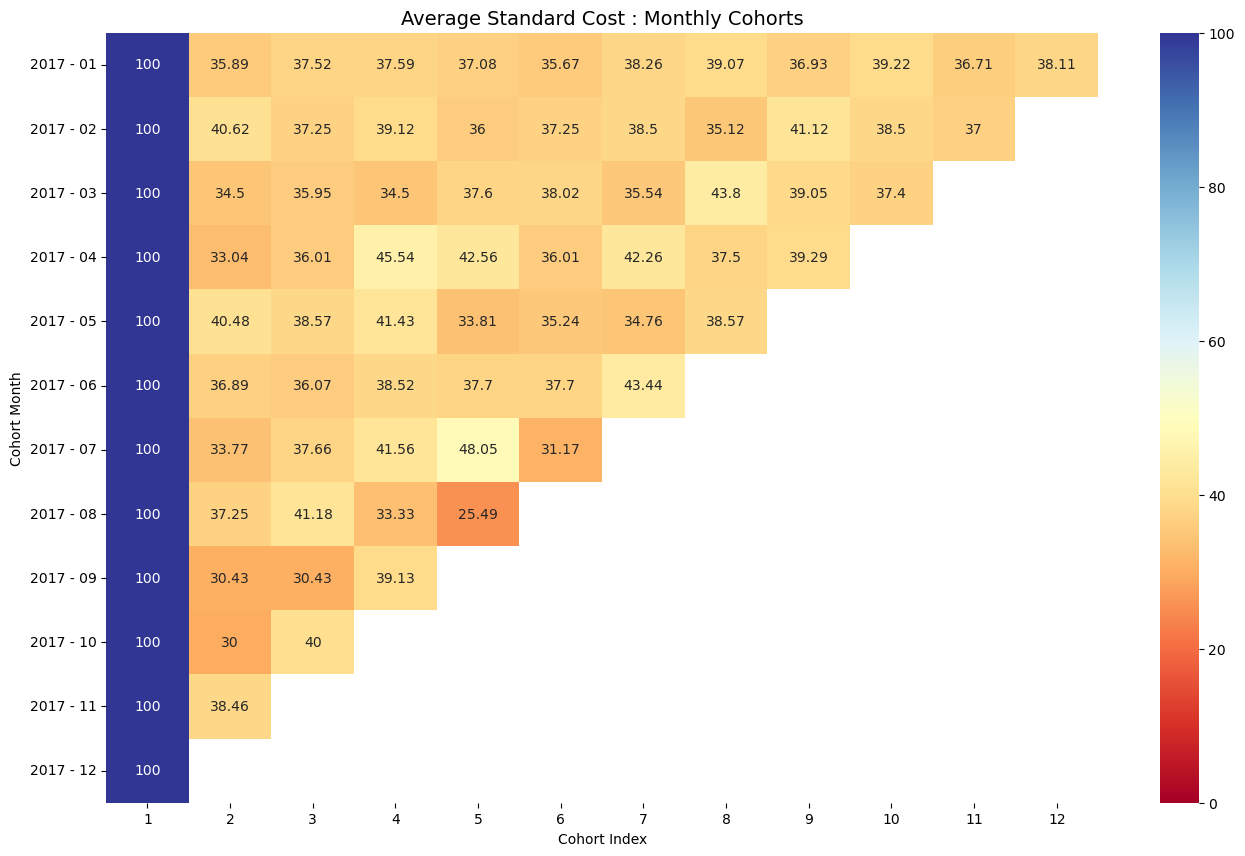

In [93]:
# Initialize the figure
plt.figure(figsize = (16,10))
#adding a title
plt.title("Average Standard Cost : Monthly Cohorts", fontsize = 14)
#creating the heatmap
sns.heatmap(final, annot = True, vmin = 0.0, vmax = 100, cmap = "RdYlBu", fmt='g')
plt.ylabel("Cohort Month")
plt.xlabel("Cohort Index")
plt.yticks( rotation = "360")
plt.show()